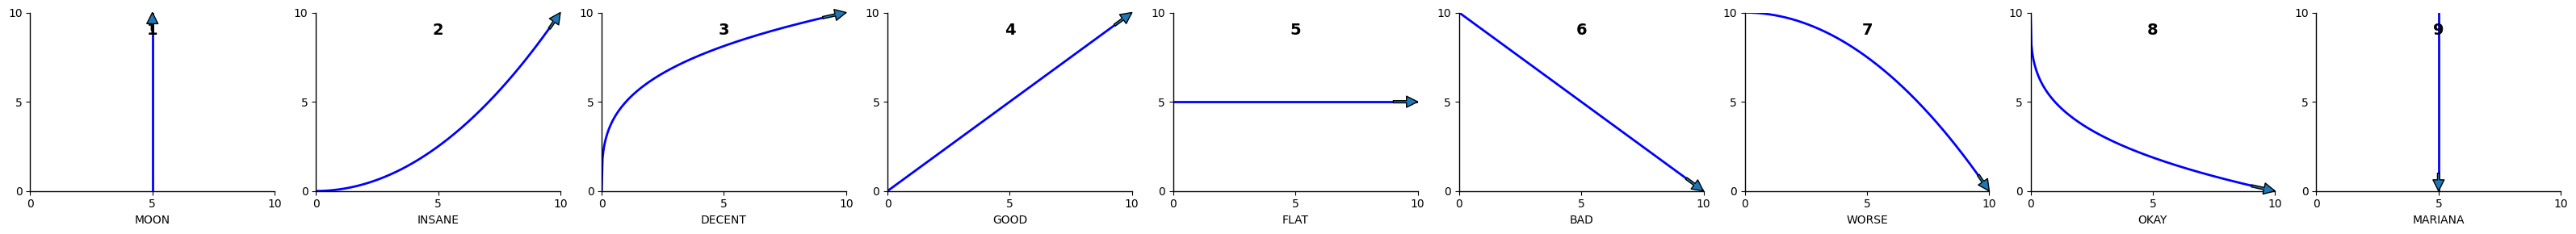

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 1. CONSTANTS
# ============================================================
ARROW_TAIL = 1     # length of arrow tail
ARROW_HEAD = 10
ARROW_WIDTH = 2

# ============================================================
# 2. PREPARE DATA
# ============================================================
x_up = np.linspace(0, 10, 300)
x_down = np.linspace(0, 10, 300)

# f(x) functions
y_insane = 10 * (x_up / 10)**2
y_decent = 10 * (x_up / 10)**0.3
y_good   = x_up
y_flat   = np.full_like(x_up, 5)
y_bad    = 10 - x_down
y_worse  = 10 * (1 - (x_down / 10)**2)
y_okay   = 10 * (1 - (x_down / 10)**0.3)

labels = [
    "MOON", "INSANE", "DECENT", "GOOD",
    "FLAT", "BAD", "WORSE", "OKAY", "MARIANA"
]

ys = [
    None,       # MOON
    y_insane,
    y_decent,
    y_good,
    y_flat,
    y_bad,
    y_worse,
    y_okay,
    None        # MARIANA
]

# ============================================================
# 3. AXIS STYLE
# ============================================================
def draw_axes(ax):
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([0, 5, 10])
    ax.set_yticks([0, 5, 10])

# ============================================================
# 4. PLOT
# ============================================================
plt.figure(figsize=(32, 3))

for i in range(9):
    ax = plt.subplot(1, 9, i + 1)
    draw_axes(ax)
    label = labels[i]

    # -------------------------
    # MOON (vertical up)
    # -------------------------
    if label == "MOON":
        ax.plot([5, 5], [0, 10], color="blue", linewidth=2)
        ax.annotate("",
                    xy=(5, 10),
                    xytext=(5, 10 - ARROW_TAIL),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD))

    # -------------------------
    # MARIANA (vertical down)
    # -------------------------
    elif label == "MARIANA":
        ax.plot([5, 5], [0, 10], color="blue", linewidth=2)
        ax.annotate("",
                    xy=(5, 0),
                    xytext=(5, 0 + ARROW_TAIL),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD))

    # -------------------------
    # NORMAL CURVES
    # -------------------------
    else:
        y = ys[i]
        ax.plot(x_up, y, color="blue", linewidth=2)

        # Compute slope at the last point (tangent)
        dx = x_up[-1] - x_up[-2]
        dy = y[-1] - y[-2]

        # Normalize tail length to ARROW_TAIL
        length = np.sqrt(dx**2 + dy**2)
        tail_dx = -ARROW_TAIL * dx / length
        tail_dy = -ARROW_TAIL * dy / length

        # For flat line, ensure horizontal arrow
        if np.isclose(dy, 0):
            tail_dx = -ARROW_TAIL
            tail_dy = 0

        # For vertical line (e.g., theoretical edge cases)
        if np.isclose(dx, 0):
            tail_dx = 0
            tail_dy = -ARROW_TAIL if dy > 0 else ARROW_TAIL

        # Draw arrow at end of curve along tangent
        ax.annotate("",
                    xy=(x_up[-1], y[-1]),
                    xytext=(x_up[-1] + tail_dx, y[-1] + tail_dy),
                    arrowprops=dict(width=ARROW_WIDTH,
                                    headwidth=ARROW_HEAD,
                                    headlength=ARROW_HEAD))

    # Title + number
    ax.set_xlabel(label, fontsize=10)
    ax.text(0.5, 0.9, str(i + 1),
            transform=ax.transAxes,
            ha='center', va='center',
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
